In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dropout, MaxPool2D, Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
input_shape = (28,28,1)

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
model = Sequential()
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(200,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.add(Dropout(0.3))

In [9]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
H = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 1.6953 - accuracy: 0.6465
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 1.1517 - accuracy: 0.6791
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 1.0239 - accuracy: 0.6842
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.9455 - accuracy: 0.6892
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.9168 - accuracy: 0.6896
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8835 - accuracy: 0.6942
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8459 - accuracy: 0.7009
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8391 - accuracy: 0.7062
Epoch 9/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.8334 - accuracy: 0.7021
Epoch 10/10
1875/1875 [==============================] - 35s 18m

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2115 - accuracy: 0.9822


[0.2115233838558197, 0.982200026512146]

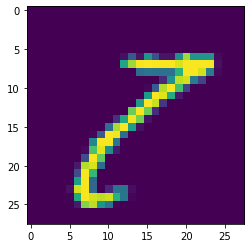

In [11]:
idx = random.randint(1,10000)
image = x_test[idx]
plt.imshow(image)
plt.show()

In [12]:
image = image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
pred = model.predict([image])
print("the predicted numbeer is: ", np.argmax(pred))

1/1 [==============================] - 0s 77ms/step
the predicted numbeer is:  7


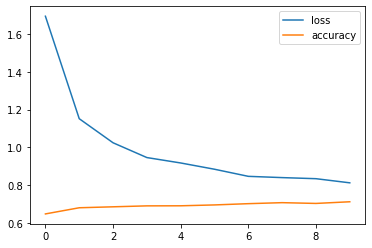

In [14]:
plt.plot(H.history['loss'])
plt.plot(H.history['accuracy'])
plt.legend(['loss','accuracy','val_loss','val_accuracy'])
plt.show()